In [81]:
%run ../Emulator.ipynb
%run ../Clusterer.ipynb
%run ../Observer.ipynb
%run ../Statistician.ipynb

# Emulate I

We instantiate the Emulator. We take the already-trained pixelwise emulator from a table.

In [110]:
a_initial = Emulator(
    region=[-35, -30, -20, -15], #[-45, 40, -30, 10],
    start_time="2017-07-01T09:00:00",
    end_time="2017-07-01T13:59:59"
)

myFeaturesNames = [
    "bparam",
    "acure_autoconv_exp_nd",
    "a_ent_1_rp",
    "acure_dry_dep_acc",
    "acure_dry_dep_ait",
    "acure_dry_dep_so2",
    "acure_bvoc_soa",
    "acure_dms",
    "acure_bl_nuc",
    "acure_ait_width",
    "acure_cloud_ph",
    "dbsdtbs_turb_0",
    "acure_bc_ri",
    "acure_sea_spray",
    "acure_carb_bb_diam",
    "acure_anth_so2_r",
    "acure_prim_so4_diam"
]

a = Emulator(
    region=[-45, 40, -30, 10], #[-45, 40, -30, 10],
    excludeFeats=list(set(a_initial.__get_input_names__()) - set(myFeaturesNames)),
    nu=0.5,
    start_time="2017-07-01T09:00:00",
    end_time="2017-07-01T13:59:59",
    centerTarget=True
)

In [56]:
a.train(
    pixelwise=True
)

c3.AODGaussianMLTrainingJob(
 typeIdent='BATCHJ:AODGMLJB',
 id='0d19fd14-bedc-463a-8a27-a30853b0bd81',
 meta=c3.Meta(
        created=datetime.datetime(2022, 11, 8, 15, 43, 22, tzinfo=datetime.timezone.utc),
        updated=datetime.datetime(2022, 11, 8, 15, 43, 22, tzinfo=datetime.timezone.utc),
        timestamp=datetime.datetime(2022, 11, 8, 15, 43, 22, tzinfo=datetime.timezone.utc)),
 version=1)

In [114]:
with open("length_scale_tables/2017-07-01T09:00:00_2017-07-01T13:59:59", "r") as f:
    lengthScales = pd.read_csv(f, index_col=0)
    # lengthScales = lengthScales.loc[lengthScales.time=='2017-07-01 12:20:00', :].reset_index(drop=True)

lengthScales

acure_bl_nuc  acure_ait_width  acure_cloud_ph  acure_carb_bb_diam  \
0        10.279244     27951.933502    34173.625881        12958.054267   
1         9.679635      8371.440315    22607.604008         6617.628868   
2     93055.817500        14.091821    66933.043894            9.534038   
3        18.775087        16.355648    48760.882495           14.472602   
4         7.812192        21.427616     7774.837096         1486.834442   
...            ...              ...             ...                 ...   
2875  31779.993140       117.261014    31066.800696        27713.781584   
2876  10485.057589       127.237304   100000.000000       100000.000000   
2877   7597.501583      4991.587688     3431.308284        32698.140358   
2878     17.110513        63.523162    28732.117394        29470.815650   
2879    171.140169     69415.603548    69036.005511           47.540678   

      acure_prim_so4_diam  acure_sea_spray  acure_anth_so2_r  acure_bvoc_soa  \
0                3.894566         3.890359         20.680621        7.103835   
1                4.016292         4.186832         23.938412        7.735001   
2                2.640051         3.485601         10.887318       12.525119   
3                2.660777         3.415261         12.702966       11.607029   
4                3.096242         3.290747         18.336361        9.099034   
...                   ...              ...               ...             ...   
2875            12.890994         7.505683         45.175308       99.417227   
2876            11.695972         8.320992       1438.620805       82.905535   
2877            12.283878         8.596209         39.698191       91.142390   
2878             9.397157         4.815036         27.309216       39.572816   
2879            56.875043         6.853389     100000.000000       26.092012   

      acure_dms  acure_dry_dep_ait  ...  acure_dry_dep_so2    acure_bc_ri  \
0      8.644871           9.167114  ...          14.387497       6.764432   
1      8.611803           8.986141  ...          13.982312       7.548642   
2      8.934389          18.996862  ...           7.309166      70.216444   
3      6.612698          13.387467  ...          10.268483  100000.000000   
4      7.366745           8.162676  ...          11.152655       7.119205   
...         ...                ...  ...                ...            ...   
2875  32.042922        7021.493254  ...          16.985564     154.849478   
2876  42.832329           9.934467  ...       11609.992293     131.621095   
2877  35.959911         339.611600  ...         100.819438      75.991064   
2878  40.537021          40.375432  ...         136.961266   32921.551490   
2879  55.645364          24.625143  ...         126.553185      25.845863   

             bparam  acure_autoconv_exp_nd  dbsdtbs_turb_0  a_ent_1_rp  \
0      11709.529728           25664.175703    11227.544326   17.268341   
1       3151.392892            8365.328473     8452.642032   20.899128   
2         33.635431           44440.220006    11756.279326   14.470100   
3         39.855245           21468.708124    20408.562877   12.977067   
4       2855.859810            1473.546372       31.284079   12.001278   
...             ...                    ...             ...         ...   
2875   29667.711828          100000.000000       41.372388   46.517412   
2876  100000.000000          100000.000000       40.037977   70.873387   
2877  100000.000000           62000.524299       29.590042   60.379513   
2878     113.647306           28305.142639     6843.004958   36.874395   
2879   42042.823384           24281.880846       42.582822   46.328378   

                                   modelId latitude  longitude  \
0     769bb205-80e6-4f21-b452-fb087b8ed22c   -0.625    -0.9375   
1     53005233-858b-464b-b589-f668a519d04c   -0.625    -0.9375   
2     72a09a5f-34d9-4b7e-b935-606e80186a7f   -0.625   -10.3125   
3     8c44f1d9-df8a-401e-8e44-e753b9b29086   -0.625   -10.3125   


## Develop

In [152]:
lat1 = 0.0
lat2 = 10.0
lon1 = 30.0
lon2 = 40.0
time1 = "2017-07-01T10:00:00"
time2 = "2017-07-01T13:59:59"
gstpFilter = c3.Filter() \
    .ge("latitude", lat1) \
    .and_().le("latitude", lat2) \
    .and_().ge("longitude", lon1) \
    .and_().le("longitude", lon2) \
    .and_().ge("time", time1) \
    .and_().le("time", time2)

In [153]:
myFeaturesNames = [
    "bparam",
    "acure_autoconv_exp_nd",
    "a_ent_1_rp",
    "acure_dry_dep_acc",
    "acure_dry_dep_ait",
    "acure_dry_dep_so2",
    "acure_bvoc_soa",
    "acure_dms",
    "acure_bl_nuc",
    "acure_ait_width",
    "acure_cloud_ph",
    "dbsdtbs_turb_0",
    "acure_bc_ri",
    "acure_sea_spray",
    "acure_carb_bb_diam",
    "acure_anth_so2_r",
    "acure_prim_so4_diam"
]

excludeFeats = [
    'acure_carb_res_ems_asi',
     'acure_carb_res_ems_lat',
     'acure_autoconv_exp_lwp',
     'acure_volc_so2',
     'acure_scav_diam',
     'acure_anth_so2_nam',
     'acure_sig_w',
     'acure_anth_so2_chi',
     'acure_carb_ff_ems_eur',
     'acure_carb_bb_ems_rsh',
     'acure_carb_bb_ems_sam',
     'acure_carb_bb_ems_bnh',
     'acure_oxidants_o3',
     'acure_kappa_oc',
     'acure_carb_bb_ems_rnh',
     'acure_carb_ff_ems_asi',
     'acure_carb_res_ems_r',
     'acure_anth_so2',
     'acure_carb_ff_ems_chi',
     'acure_rain_frac',
     'acure_carb_ff_ems_r',
     'acure_carb_bb_ems_saf',
     'm_ci',
     'acure_carb_ff_ems_nam',
     'c_r_correl',
     'acure_carb_bb_ems_naf',
     'acure_carb_res_ems_chi',
     'acure_carb_ff_ems_mar',
     'acure_carb_res_ems_afr',
     'acure_anth_so2_asi',
     'acure_prim_moc',
     'acure_anth_so2_eur',
     'two_d_fsd_factor',
     'acure_convective_plume_scavenging',
     'ai',
     'acure_carb_ff_diam',
     'acure_carb_res_ems',
     'acure_carb_bb_ems',
     'acure_carb_res_diam',
     'acure_carb_ff_ems',
     'acure_oxidants_oh',
     'acure_cloud_ice_thresh'
]

In [154]:
kernelLen = 59 - len(excludeFeats)

GPR_kernel = c3.SklearnGPRKernelMatern(
    lengthScale=[1.0]*kernelLen, nu=0.5, coefficient=1.0
).build().kernel

GPR_technique = c3.GaussianProcessRegressionTechnique(
    randomState=42,
    kernel=GPR_kernel
)
GPR_technique.centerTarget=False

In [133]:
# create synthetic data with numpy
import numpy as np

synth = np.random.rand(100, kernelLen)

# cast it into a c3.Dataset
synthDataset = c3.Dataset.fromPython(pythonData=synth)

In [134]:
job = c3.PredictAODGPR.makePredictionsJob(excludeFeats, gstpFilter, "all", synthDataset, GPR_technique, 10)

In [151]:
job.status()

c3.MapReduceStatus(
 started=datetime.datetime(2022, 11, 8, 18, 11, 39, tzinfo=datetime.timezone.utc),
 startedby='jcarzon@andrew.cmu.edu',
 completed=datetime.datetime(2022, 11, 8, 18, 14, 29, tzinfo=datetime.timezone.utc),
 status='completed')

In [146]:
print(job.status().errors[0].errorMsg)

TypeError: 'NoneType' object is not subscriptable

In [147]:
df = c3.PredictAODGPR.getPredictionsDataframeFromJob(job)

In [148]:
df

mean        sd    lat      lon                 time  \
0   -0.044970  0.028639  0.625  38.4375  2017-07-01T12:20:00   
1   -0.005469  0.025089  0.625  38.4375  2017-07-01T12:20:00   
2    0.020791  0.025142  0.625  38.4375  2017-07-01T12:20:00   
3   -0.001884  0.025629  0.625  38.4375  2017-07-01T12:20:00   
4   -0.001631  0.028404  0.625  38.4375  2017-07-01T12:20:00   
..        ...       ...    ...      ...                  ...   
795  0.060665  0.037961  9.375  38.4375  2017-07-01T12:20:00   
796  0.110189  0.040266  9.375  38.4375  2017-07-01T12:20:00   
797  0.007322  0.042192  9.375  38.4375  2017-07-01T12:20:00   
798  0.025580  0.038413  9.375  38.4375  2017-07-01T12:20:00   
799 -0.049923  0.039657  9.375  38.4375  2017-07-01T12:20:00   

                                  modelId  
0    d993d731-4c02-4422-9908-20e3518f4b2a  
1    d993d731-4c02-4422-9908-20e3518f4b2a  
2    d993d731-4c02-4422-9908-20e3518f4b2a  
3    d993d731-4c02-4422-9908-20e3518f4b2a  
4    d993d731-4c02-4422-9908-20e3518f4b2a  
..                                    ...  
795  722201c3-62f0-4be0-b79b-de64c64b64a6  
796  722201c3-62f0-4be0-b79b-de64c64b64a6  
797  722201c3-62f0-4be0-b79b-de64c64b64a6  
798  722201c3-62f0-4be0-b79b-de64c64b64a6  
799  722201c3-62f0-4be0-b79b-de64c64b64a6  

[800 rows x 6 columns]

In [149]:
c3.GaussianProcessRegressionPipe.get('d993d731-4c02-4422-9908-20e3518f4b2a')

c3.GaussianProcessRegressionPipe(
 id='d993d731-4c02-4422-9908-20e3518f4b2a',
 meta=c3.Meta(
        tenantTagId=151,
        tenant='dev',
        tag='tc02d',
        created=datetime.datetime(2022, 11, 8, 15, 58, 21, tzinfo=datetime.timezone.utc),
        createdBy='worker',
        updated=datetime.datetime(2022, 11, 8, 15, 58, 21, tzinfo=datetime.timezone.utc),
        updatedBy='worker',
        timestamp=datetime.datetime(2022, 11, 8, 15, 58, 21, tzinfo=datetime.timezone.utc),
        fetchInclude='[]',
        fetchType='GaussianProcessRegressionPipe'),
 version=1,
 typeIdent='PIPE:LF:GPREG',
 noTrainScore=False,
 persistedModelCategory='unidentified',
 untrainableOverride=False,
 technique=c3.GaussianProcessRegressionTechnique(
             id='COFC',
             centerTarget=False,
             validation=False,
             randomSeed=42,
             splitFraction=0.2),
 trainedModel=c3.MLTrainedModelArtifact(
                model='eJzMvGdXVd3WLQhKUFAQBQVEEFGSKMGACLiIgoAi

In [80]:
np.unique(df.lon)

array([38.4375])

In [13]:
params = pd.DataFrame(data=synth, columns=myFeaturesNames)
params

bparam  acure_autoconv_exp_nd  a_ent_1_rp  acure_dry_dep_acc  \
0   0.204836               0.506037    0.221918           0.347199   
1   0.416962               0.772438    0.145995           0.338700   
2   0.435631               0.762416    0.503233           0.292994   
3   0.653755               0.267651    0.208070           0.538128   
4   0.783148               0.443038    0.694510           0.242818   
..       ...                    ...         ...                ...   
95  0.250076               0.619929    0.179479           0.612455   
96  0.890453               0.784350    0.298431           0.126028   
97  0.122494               0.367200    0.272025           0.756464   
98  0.422276               0.313363    0.104229           0.374886   
99  0.157503               0.892528    0.424230           0.634468   

    acure_dry_dep_ait  acure_dry_dep_so2  acure_bvoc_soa  acure_dms  \
0            0.641516           0.567126        0.214767   0.111400   
1            0.816573           0.696398        0.411652   0.700532   
2            0.304274           0.251464        0.881613   0.198870   
3            0.897327           0.560802        0.197355   0.060992   
4            0.989346           0.831210        0.019232   0.818327   
..                ...                ...             ...        ...   
95           0.459652           0.153941        0.604704   0.780189   
96           0.508563           0.731963        0.515167   0.359197   
97           0.009455           0.055097        0.167879   0.293301   
98           0.691286           0.107625        0.116665   0.961884   
99           0.729572           0.121961        0.686917   0.066220   

    acure_bl_nuc  acure_ait_width  acure_cloud_ph  dbsdtbs_turb_0  \
0       0.907719         0.569885        0.398967        0.631296   
1       0.186771         0.496434        0.503273        0.935625   
2       0.602647         0.012398        0.951885        0.810143   
3       0.976706         0.453668        0.085551        0.174245   
4       0.780191         0.770307        0.929424        0.553786   
..           ...              ...             ...             ...   
95      0.474565         0.261080        0.685454        0.609938   
96      0.608250         0.330903        0.239206        0.048290   
97      0.795821         0.277317        0.659805        0.701388   
98      0.684824         0.771022        0.756202        0.688346   
99      0.442555         0.756924        0.599647        0.630684   

    acure_bc_ri  acure_sea_spray  acure_carb_bb_diam  acure_anth_so2_r  \
0      0.880973         0.766274            0.479178          0.673182   
1      0.121397         0.368926            0.895240          0.882983   
2      0.318580         0.974978            0.647194          0.022997   
3      0.703106         0.550224            0.690194          0.971885   
4      0.003364         0.421212            0.929247          0.396487   
..          ...              ...                 ...               ...   
95     0.995976         0.745162            0.697351          0.092358   
96     0.279610         0.529889            0.964818          0.508683   
97     0.400880         0.625274            0.965536          0.750508   
98     0.124440         0.002808            0.761687          0.795502   
99     0.347274         0.001450            0.245223          0.729396   

    acure_prim_so4_diam  
0              0.965583  
1              0.586544  
2              0.247172  
3              0.863494  
4              0.545798  
..                  ...  
95             0.442168  
96             0.692251  
97             0.803285  
98             0.954923  
99             0.540870  

[100 rows x 17 columns]

In [15]:
df[myFeaturesNames] = pd.concat([pd.DataFrame(synth)]*144, ignore_index=True, axis=0)
df['variant'] = [k for i in range(144) for k in range(100)]

In [43]:
with open("predictions/2017-07-01T09:00:00_2017-07-01T13:59:59", "w") as f:
    f.write(df.to_csv())
f.close()

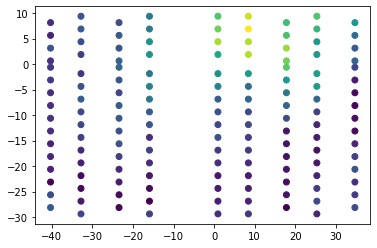

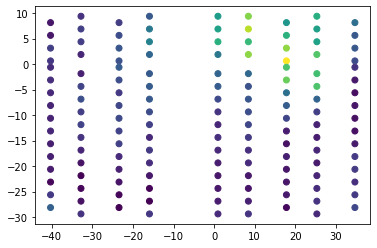

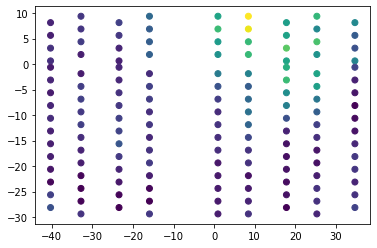

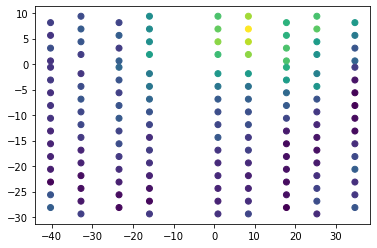

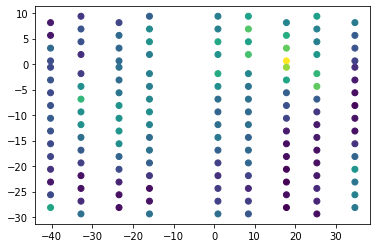

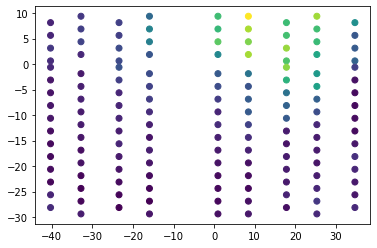

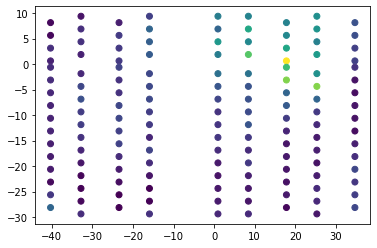

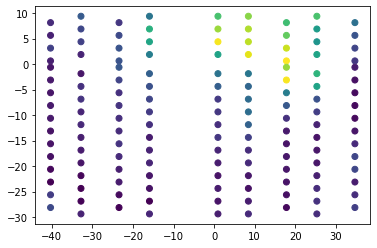

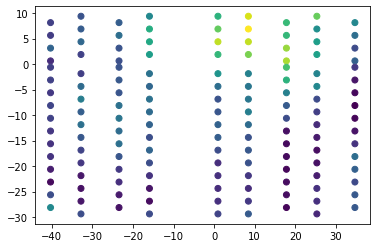

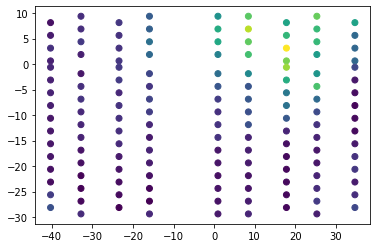

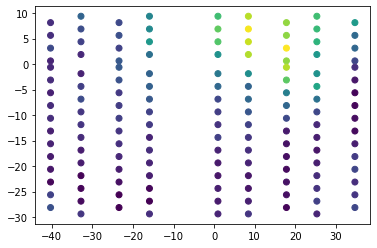

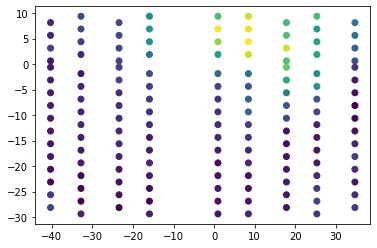

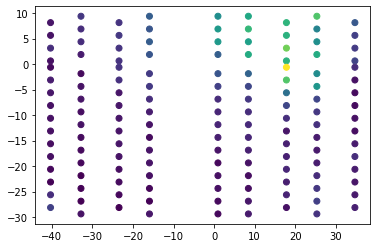

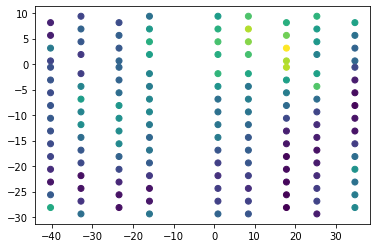

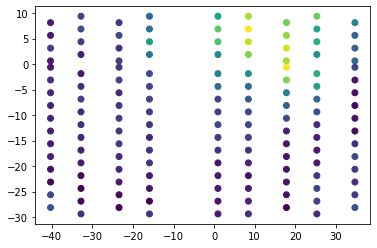

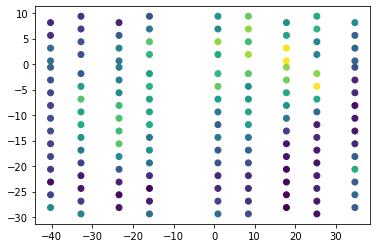

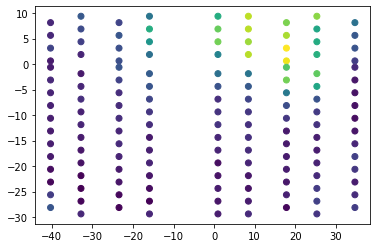

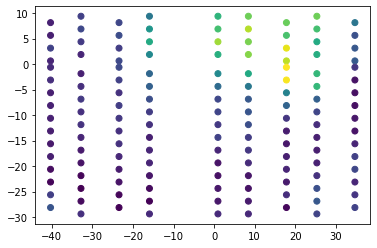

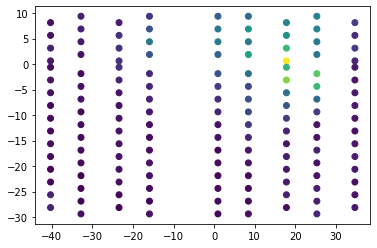

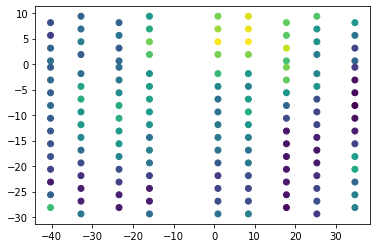

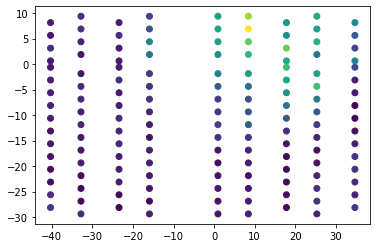

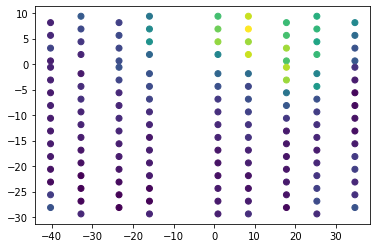

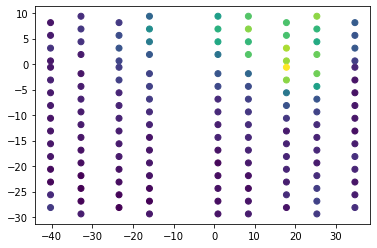

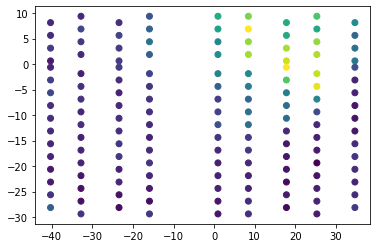

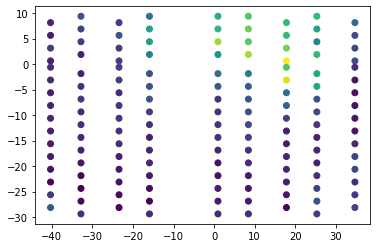

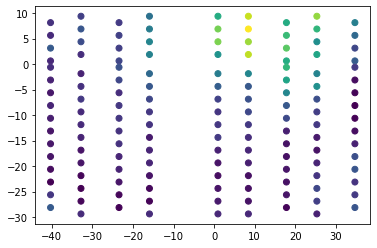

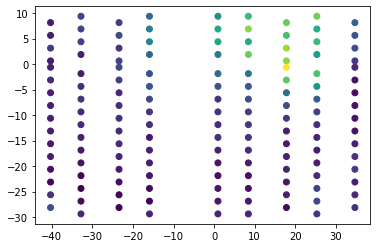

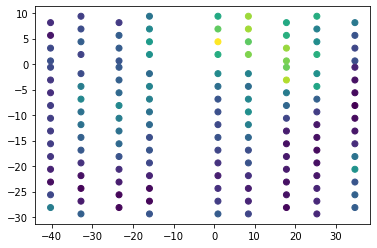

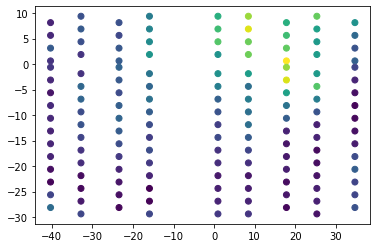

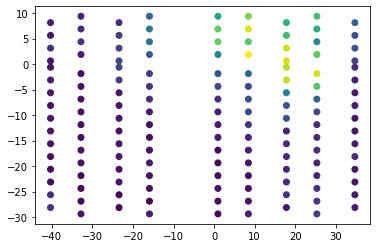

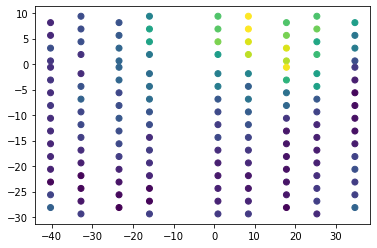

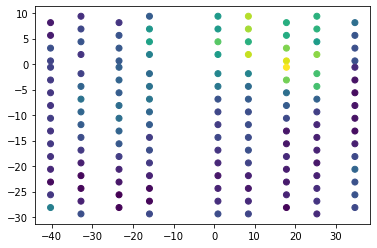

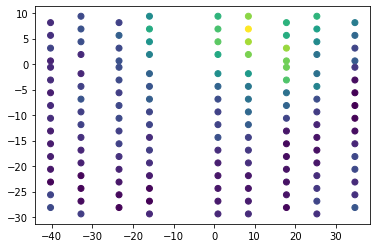

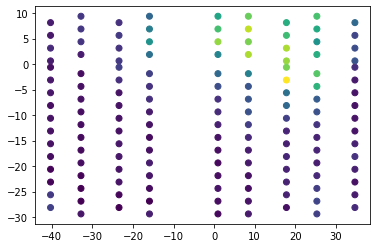

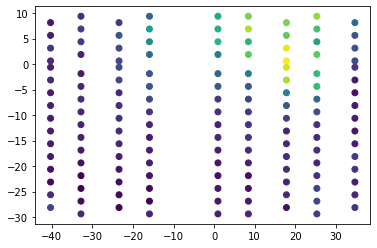

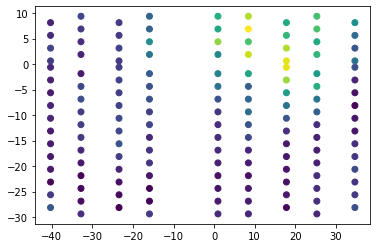

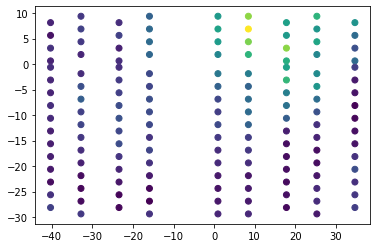

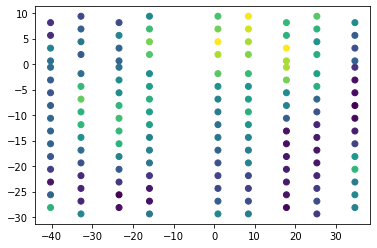

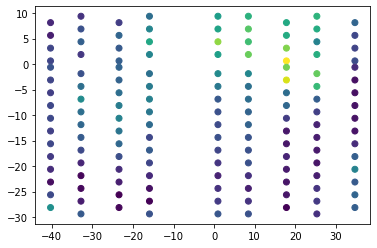

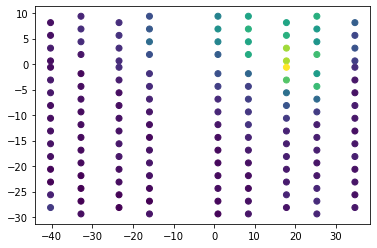

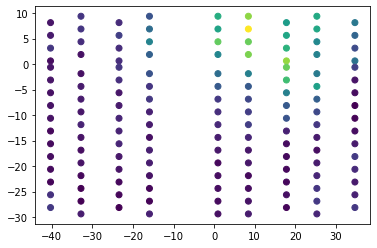

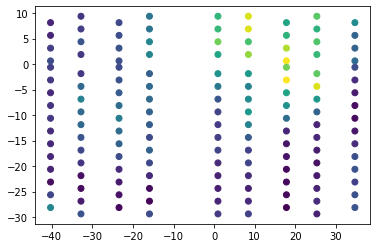

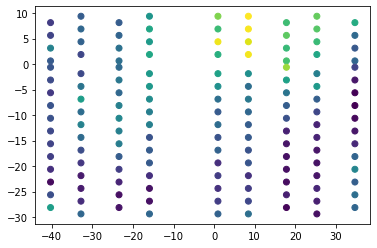

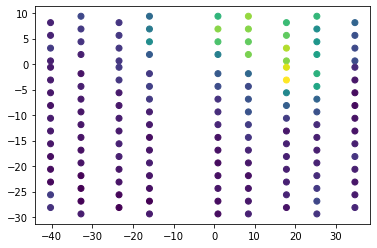

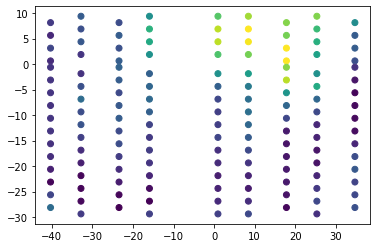

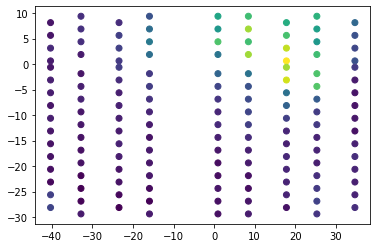

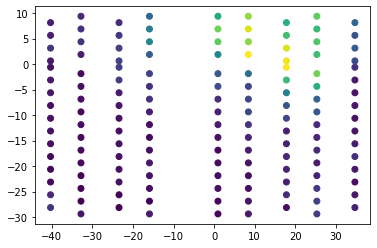

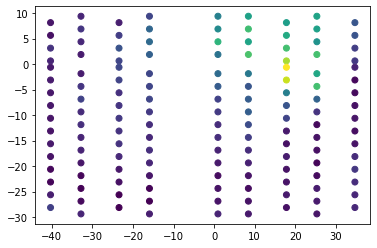

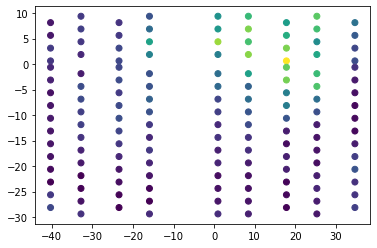

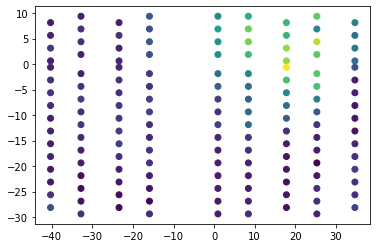

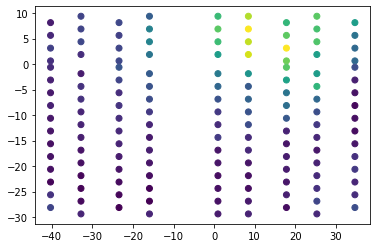

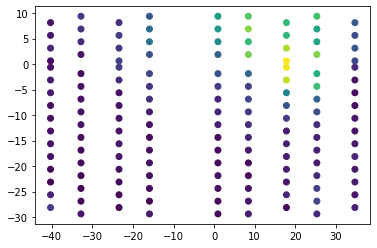

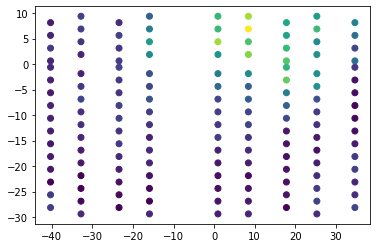

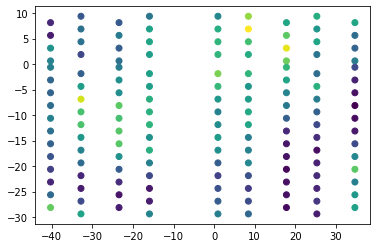

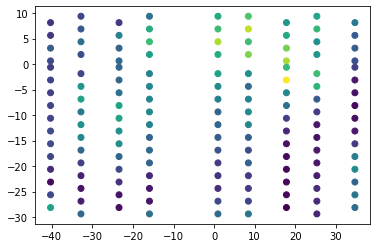

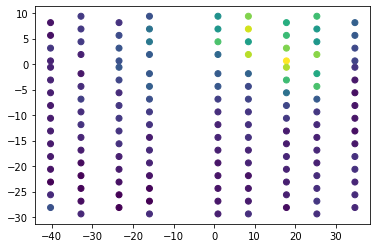

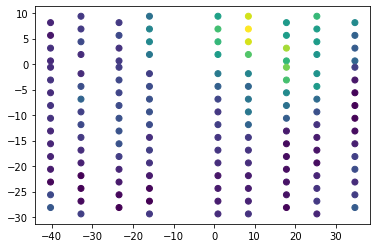

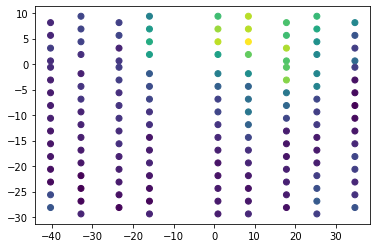

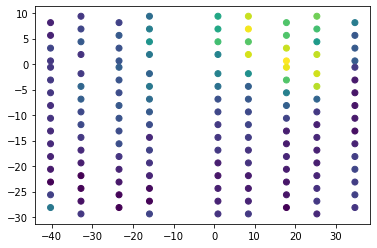

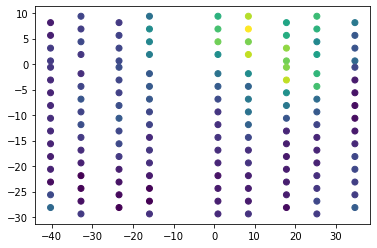

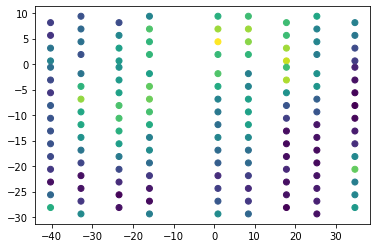

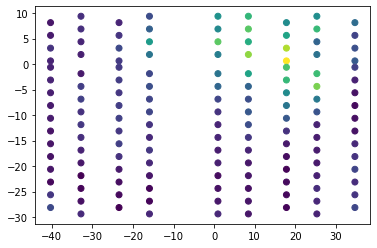

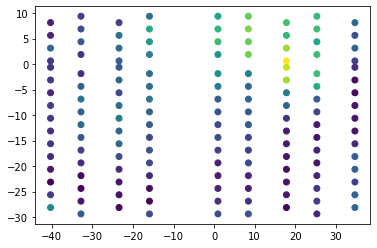

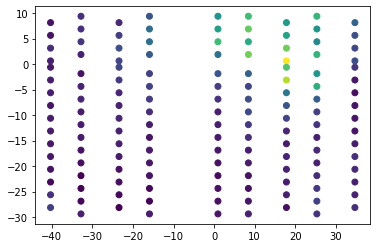

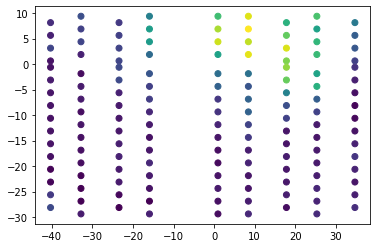

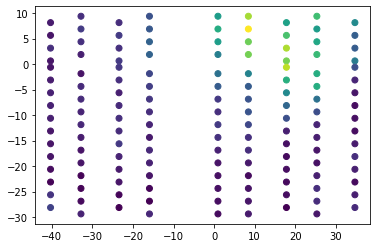

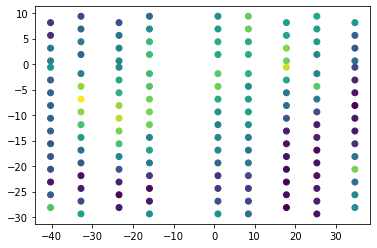

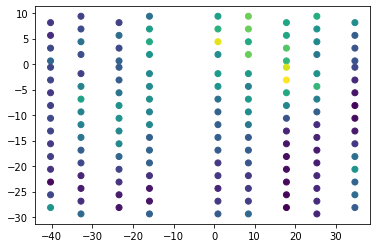

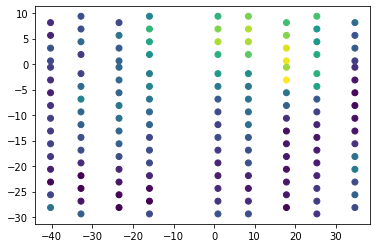

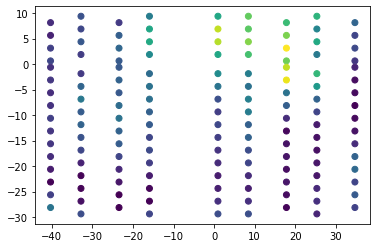

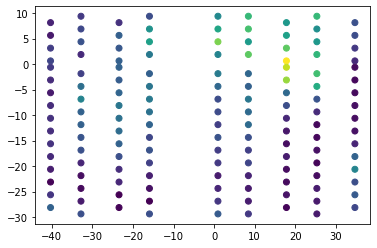

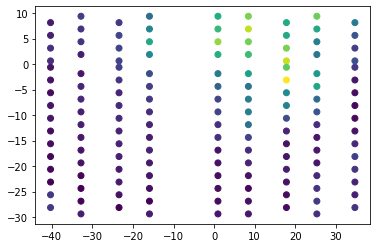

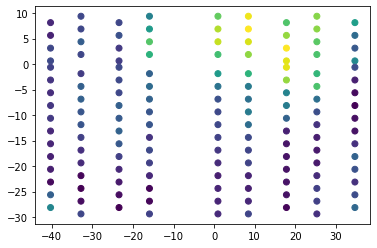

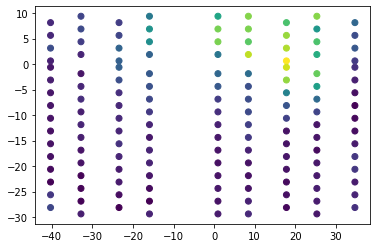

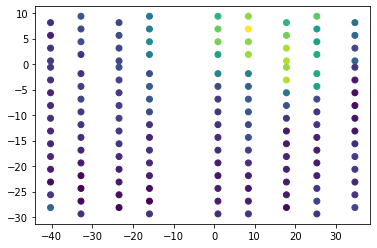

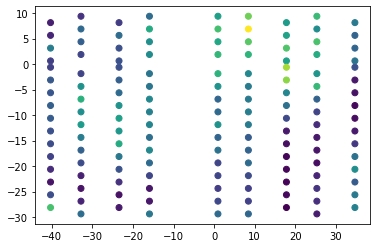

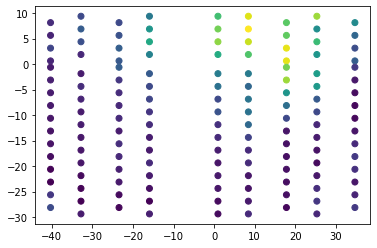

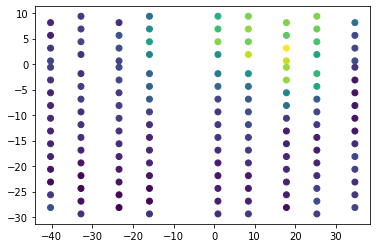

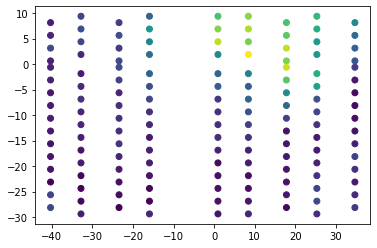

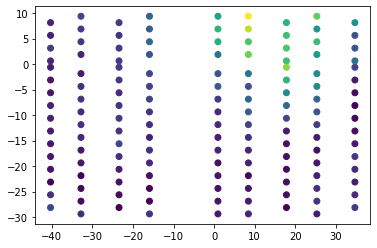

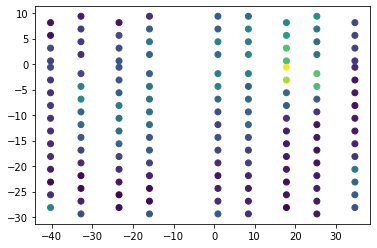

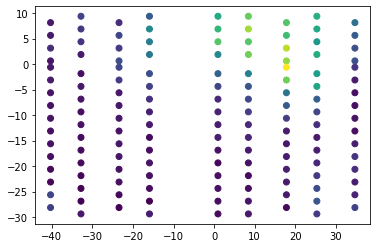

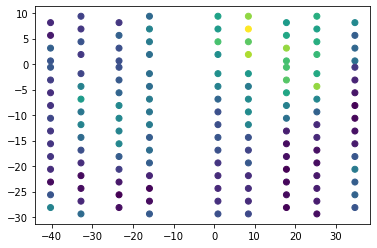

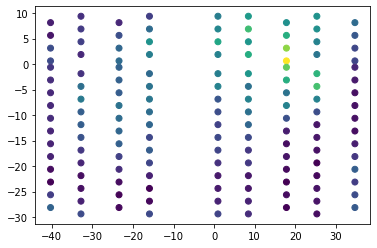

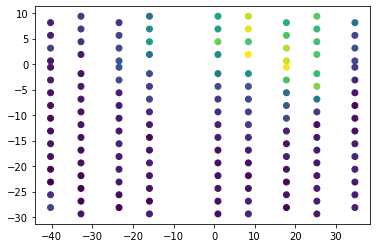

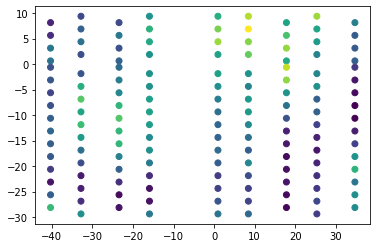

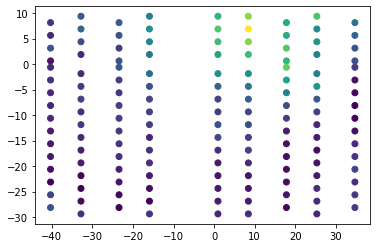

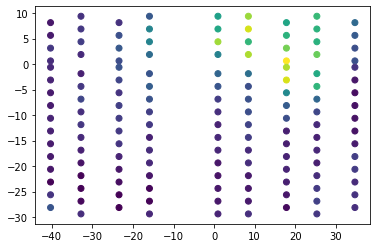

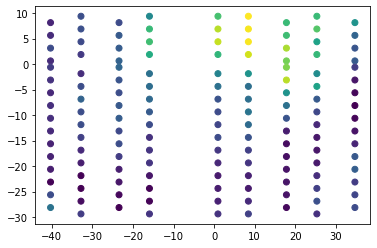

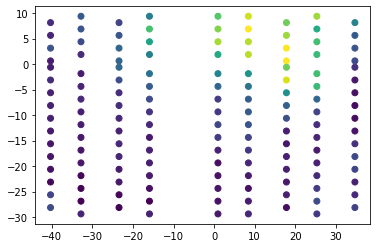

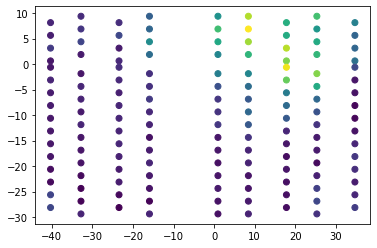

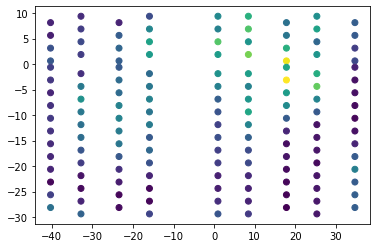

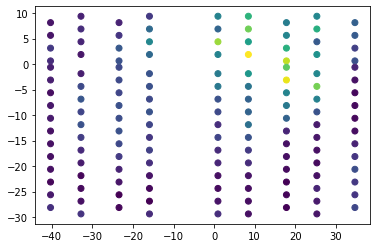

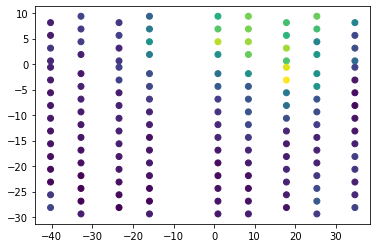

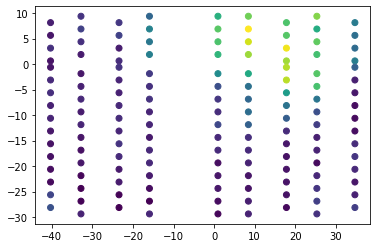

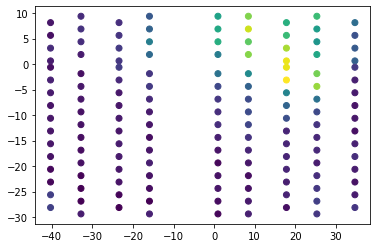

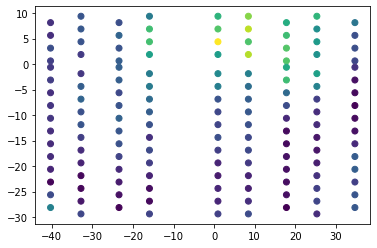

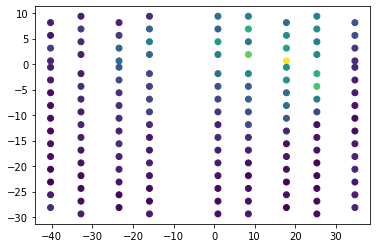

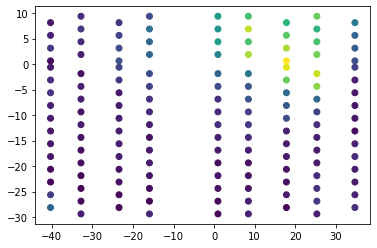

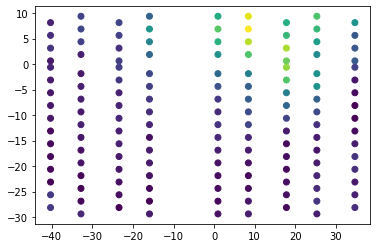

In [41]:
import matplotlib.pyplot as plt

for variant in np.unique(df.variant):
    
    dfv = df.loc[df.variant==variant, :]
    
    
    plt.scatter(dfv.lon, dfv.lat, c=dfv['mean'])
    plt.show()

## Grab predictions

In [3]:
import pandas as pd
with open("predictions/2017-07-01T09:00:00_2017-07-01T13:59:59", "r") as f:
    preds = pd.read_csv(f, index_col=0)
preds

mean        sd    lat      lon                 time  \
0      0.187127  0.033433 -0.625 -23.4375  2017-07-01T12:20:00   
1      0.234654  0.036036 -0.625 -23.4375  2017-07-01T12:20:00   
2      0.045212  0.035719 -0.625 -23.4375  2017-07-01T12:20:00   
3      0.216484  0.040247 -0.625 -23.4375  2017-07-01T12:20:00   
4      0.175290  0.039558 -0.625 -23.4375  2017-07-01T12:20:00   
...         ...       ...    ...      ...                  ...   
14395  0.174849  0.032809 -6.875   8.4375  2017-07-01T12:20:00   
14396  0.222746  0.031809 -6.875   8.4375  2017-07-01T12:20:00   
14397  0.138185  0.034171 -6.875   8.4375  2017-07-01T12:20:00   
14398  0.161818  0.035687 -6.875   8.4375  2017-07-01T12:20:00   
14399  0.144623  0.031237 -6.875   8.4375  2017-07-01T12:20:00   

                                    modelId    bparam  acure_autoconv_exp_nd  \
0      8d794782-944c-40ab-9221-fdd710ad46c2  0.204836               0.506037   
1      8d794782-944c-40ab-9221-fdd710ad46c2  0.416962               0.772438   
2      8d794782-944c-40ab-9221-fdd710ad46c2  0.435631               0.762416   
3      8d794782-944c-40ab-9221-fdd710ad46c2  0.653755               0.267651   
4      8d794782-944c-40ab-9221-fdd710ad46c2  0.783148               0.443038   
...                                     ...       ...                    ...   
14395  f183f24c-194d-48b6-802f-f6ad407c8d03  0.250076               0.619929   
14396  f183f24c-194d-48b6-802f-f6ad407c8d03  0.890453               0.784350   
14397  f183f24c-194d-48b6-802f-f6ad407c8d03  0.122494               0.367200   
14398  f183f24c-194d-48b6-802f-f6ad407c8d03  0.422276               0.313363   
14399  f183f24c-194d-48b6-802f-f6ad407c8d03  0.157503               0.892528   

       a_ent_1_rp  acure_dry_dep_acc  ...  acure_bl_nuc  acure_ait_width  \
0        0.221918           0.347199  ...      0.907719         0.569885   
1        0.145995           0.338700  ...      0.186771         0.496434   
2        0.503233           0.292994  ...      0.602647         0.012398   
3        0.208070           0.538128  ...      0.976706         0.453668   
4        0.694510           0.242818  ...      0.780191         0.770307   
...           ...                ...  ...           ...              ...   
14395    0.179479           0.612455  ...      0.474565         0.261080   
14396    0.298431           0.126028  ...      0.608250         0.330903   
14397    0.272025           0.756464  ...      0.795821         0.277317   
14398    0.104229           0.374886  ...      0.684824         0.771022   
14399    0.424230           0.634468  ...      0.442555         0.756924   

       acure_cloud_ph  dbsdtbs_turb_0  acure_bc_ri  acure_sea_spray  \
0            0.398967        0.631296     0.880973         0.766274   
1            0.503273        0.935625     0.121397         0.368926   
2            0.951885        0.810143     0.318580         0.974978   
3            0.085551        0.174245     0.703106         0.550224   
4            0.929424        0.553786     0.003364         0.421212   
...               ...             ...          ...              ...   
14395        0.685454        0.609938     0.995976         0.745162   
14396        0.239206        0.048290     0.279610         0.529889   
14397        0.659805        0.701388     0.400880         0.625274   
14398        0.756202        0.688346     0.124440         0.002808   
14399        0.599647        0.630684     0.347274         0.001450   

       acure_carb_bb_diam  acure_anth_so2_r  acure_prim_so4_diam  variant  
0                0.479178          0.673182             0.965583        0  
1                0.895240          0.882983             0.586544        1  
2                0.647194          0.022997             0.247172        2  
3                0.690194          0.971885             0.863494        3  
4                0.929247          0.396487             0.545798        4  
...                   ...          

# Select

We perform the clustering procedure to define regions.

In [12]:
b = Clusterer(a, lengthScales=lengthScales)

In [13]:
b.cluster_pixels(
    k=5,
    handleSmallClusters=False,
    handleLargeClusters=False
)

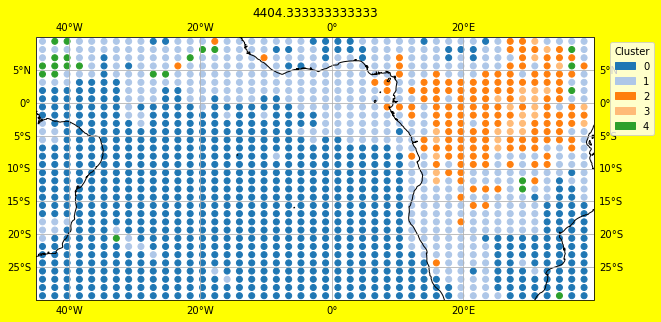

In [14]:
b.plot_clusters(
    '',
    save=False
)

In [15]:
np.unique(b.labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([808, 435, 147,  28,  22]))

# Observe

We collect the satellite observations.

In [16]:
c = Observer(a)

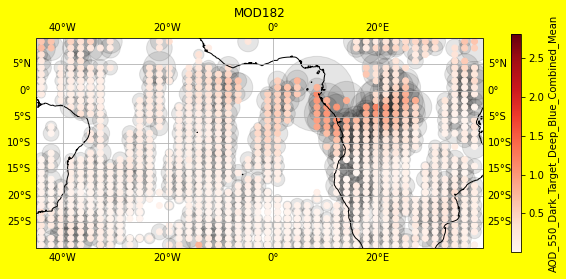

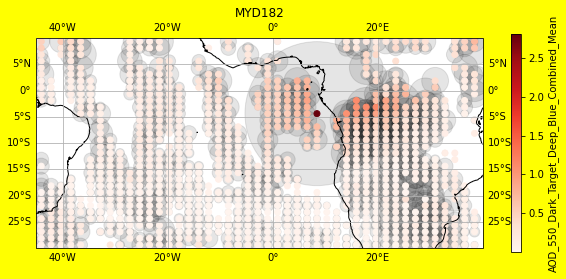

In [17]:
c.plot_observations()

In [20]:
obs = c.rgdatasets['MOD182']
obs

latitude  longitude         time  meanResponse  sdResponse
0      -29.375   -44.0625  4377.333333         0.127       0.026
1      -28.125   -44.0625  4377.333333         0.086       0.010
2      -26.875   -44.0625  4377.333333         0.106       0.006
3      -25.625   -44.0625  4377.333333         0.224       0.020
4      -24.375   -44.0625  4377.333333         0.231       0.011
...        ...        ...          ...           ...         ...
1435     4.375    38.4375  4377.333333         0.273       0.007
1436     5.625    38.4375  4377.333333           NaN         NaN
1437     6.875    38.4375  4377.333333           NaN         NaN
1438     8.125    38.4375  4377.333333         0.516       0.081
1439     9.375    38.4375  4377.333333         0.614       0.000

[1440 rows x 5 columns]

# Invert

In [21]:
preds

mean        sd    lat      lon                 time  \
0      0.187127  0.033433 -0.625 -23.4375  2017-07-01T12:20:00   
1      0.234654  0.036036 -0.625 -23.4375  2017-07-01T12:20:00   
2      0.045212  0.035719 -0.625 -23.4375  2017-07-01T12:20:00   
3      0.216484  0.040247 -0.625 -23.4375  2017-07-01T12:20:00   
4      0.175290  0.039558 -0.625 -23.4375  2017-07-01T12:20:00   
...         ...       ...    ...      ...                  ...   
14395  0.174849  0.032809 -6.875   8.4375  2017-07-01T12:20:00   
14396  0.222746  0.031809 -6.875   8.4375  2017-07-01T12:20:00   
14397  0.138185  0.034171 -6.875   8.4375  2017-07-01T12:20:00   
14398  0.161818  0.035687 -6.875   8.4375  2017-07-01T12:20:00   
14399  0.144623  0.031237 -6.875   8.4375  2017-07-01T12:20:00   

                                    modelId    bparam  acure_autoconv_exp_nd  \
0      8d794782-944c-40ab-9221-fdd710ad46c2  0.204836               0.506037   
1      8d794782-944c-40ab-9221-fdd710ad46c2  0.416962               0.772438   
2      8d794782-944c-40ab-9221-fdd710ad46c2  0.435631               0.762416   
3      8d794782-944c-40ab-9221-fdd710ad46c2  0.653755               0.267651   
4      8d794782-944c-40ab-9221-fdd710ad46c2  0.783148               0.443038   
...                                     ...       ...                    ...   
14395  f183f24c-194d-48b6-802f-f6ad407c8d03  0.250076               0.619929   
14396  f183f24c-194d-48b6-802f-f6ad407c8d03  0.890453               0.784350   
14397  f183f24c-194d-48b6-802f-f6ad407c8d03  0.122494               0.367200   
14398  f183f24c-194d-48b6-802f-f6ad407c8d03  0.422276               0.313363   
14399  f183f24c-194d-48b6-802f-f6ad407c8d03  0.157503               0.892528   

       a_ent_1_rp  acure_dry_dep_acc  ...  acure_bl_nuc  acure_ait_width  \
0        0.221918           0.347199  ...      0.907719         0.569885   
1        0.145995           0.338700  ...      0.186771         0.496434   
2        0.503233           0.292994  ...      0.602647         0.012398   
3        0.208070           0.538128  ...      0.976706         0.453668   
4        0.694510           0.242818  ...      0.780191         0.770307   
...           ...                ...  ...           ...              ...   
14395    0.179479           0.612455  ...      0.474565         0.261080   
14396    0.298431           0.126028  ...      0.608250         0.330903   
14397    0.272025           0.756464  ...      0.795821         0.277317   
14398    0.104229           0.374886  ...      0.684824         0.771022   
14399    0.424230           0.634468  ...      0.442555         0.756924   

       acure_cloud_ph  dbsdtbs_turb_0  acure_bc_ri  acure_sea_spray  \
0            0.398967        0.631296     0.880973         0.766274   
1            0.503273        0.935625     0.121397         0.368926   
2            0.951885        0.810143     0.318580         0.974978   
3            0.085551        0.174245     0.703106         0.550224   
4            0.929424        0.553786     0.003364         0.421212   
...               ...             ...          ...              ...   
14395        0.685454        0.609938     0.995976         0.745162   
14396        0.239206        0.048290     0.279610         0.529889   
14397        0.659805        0.701388     0.400880         0.625274   
14398        0.756202        0.688346     0.124440         0.002808   
14399        0.599647        0.630684     0.347274         0.001450   

       acure_carb_bb_diam  acure_anth_so2_r  acure_prim_so4_diam  variant  
0                0.479178          0.673182             0.965583        0  
1                0.895240          0.882983             0.586544        1  
2                0.647194          0.022997             0.247172        2  
3                0.690194          0.971885             0.863494        3  
4                0.929247          0.396487             0.545798        4  
...                   ...          

In [22]:
obs

latitude  longitude         time  meanResponse  sdResponse
0      -29.375   -44.0625  4377.333333         0.127       0.026
1      -28.125   -44.0625  4377.333333         0.086       0.010
2      -26.875   -44.0625  4377.333333         0.106       0.006
3      -25.625   -44.0625  4377.333333         0.224       0.020
4      -24.375   -44.0625  4377.333333         0.231       0.011
...        ...        ...          ...           ...         ...
1435     4.375    38.4375  4377.333333         0.273       0.007
1436     5.625    38.4375  4377.333333           NaN         NaN
1437     6.875    38.4375  4377.333333           NaN         NaN
1438     8.125    38.4375  4377.333333         0.516       0.081
1439     9.375    38.4375  4377.333333         0.614       0.000

[1440 rows x 5 columns]

In [35]:
def compute_implausibility(preds, obs):
    y = np.array(my_preds['mean'])
    z = np.array(my_obs['meanResponse'])
    S = np.diag(np.array(my_preds['sd']))
    E = np.diag(np.array(my_obs['sdResponse']))
    
    xf = np.nan_to_num(y - z)
    Mf = S + np.nan_to_num(E)

    return np.transpose(xf)@np.linalg.inv(Mf)@(xf)

In [37]:
implausibilities = []

for variant in np.unique(preds.variant):
    my_preds = preds.loc[preds.variant==variant, :].sort_values(by=['time', 'lon', 'lat'])
    
    my_pixels = my_preds.loc[:, ['lat', 'lon']].to_numpy().tolist()
    
    measured_pixels = obs.loc[:, ['latitude', 'longitude']].to_numpy().tolist()
    
    #print(my_pixels)
    #print(measured_pixels)
    my_obs = obs.loc[[k for k in range(len(measured_pixels)) if measured_pixels[k] in my_pixels], :].reset_index(drop=True)
    
    implausibilities.append(compute_implausibility(my_preds, my_obs))

print(implausibilities)

[47.856559590376136, 44.61218994780286, 77.69936081435776, 42.08248028968676, 54.75087622800015, 61.56232670091732, 45.199786130038916, 37.822955852346226, 52.16079102011387, 57.06657693402783, 44.914439814351454, 54.67213566259424, 45.56711037046533, 51.31910776686065, 51.434337027285096, 60.90922148098673, 45.59740513418981, 39.37329998094367, 41.00714837837704, 56.07056960394893, 64.81968827751784, 50.48002976047854, 46.17822271754275, 67.02552604362064, 39.70233998314172, 49.959161190269846, 43.79932728711297, 49.89102136813841, 60.516636298351145, 44.12744141058637, 47.2734007236143, 66.71042368768319, 46.13881367987349, 40.23572374386276, 47.09487693296403, 71.06751299654098, 65.22362397795122, 66.13872910995023, 80.05182734518002, 49.46214749446894, 69.60442758772268, 69.3733718252137, 54.25593374081971, 51.46753700044711, 42.681270351361725, 40.127609656393794, 47.43803814911896, 40.72253561316839, 58.3629608497714, 69.21497597521187, 53.90263204440207, 53.47602931968873, 49.42

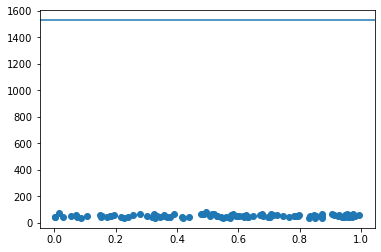

In [40]:
import scipy

plt.scatter(np.unique(preds.acure_sea_spray), implausibilities)
plt.axhline(scipy.stats.chi2.ppf(
            0.95,
            len(obs.meanResponse)
))

## Part I

First we measure the implausibility of various random points in the hypercube.

In [ ]:
d = Statistician(a, b, c, pixelwise=False)

In [ ]:
d.observations

In [ ]:
d.get_regional_emulations(regional_emulators_models, d.__get_random_model_variants__(nVariants=1)[0])

In [ ]:
df = d.emulated.sort_values(['time', 'longitude', 'latitude'])
df

In [ ]:
S = np.diag(np.array(df['sdResponse']))
S

In [ ]:
y = np.array(df['meanResponse'])
y

In [ ]:
z = np.array(d.observations['meanResponse'])
print(z)
E = np.diag(np.array(d.observations['sdResponse']))
print(E)

In [ ]:
xf = np.nan_to_num(y - z)
np.transpose(xf)@xf

In [ ]:
np.transpose(xf)@np.linalg.inv(S + np.nan_to_num(E))@xf

In [ ]:
Mf = S + np.nan_to_num(E)

np.transpose(xf)@np.linalg.inv(Mf)@(xf)

In [ ]:
results = d.compute_statistics(
    10,
    regional_emulators_models,
    variantsFromTraining=False
)

In [ ]:
d.plot_statistics(results)

## Part II

Then we look at the training points and just toggle one parameter at a time. All variants appear implausible here!

In [ ]:
for param in ['acure_sea_spray']: #d.emulator.inputs:
    print(param)
    for point in [10, 50, 100]:
        print(point)

        results2 = d.compute_statistics(
            10,
            regional_emulators,
            b.lengthscales,
            b.labels,
            variantsFromTraining=True,
            whichParameter=param,
            whichPoint=point
        )

        d.plot_statistics(
            results2,
            whichParameter=param
        )

## Part III

Taking the most plausible variants from our earlier ensemble, let's just toggle sea spray in each one.

In [ ]:
for idx in range(25):
    
    my_variant = results.sort_values('metric').reset_index(drop=True).loc[idx, :'acure_dry_dep_so2']
    
    model_variants = pd.concat([my_variant]*10, axis=1).transpose().reset_index(drop=True)
    model_variants.loc[:, 'acure_sea_spray'] = np.linspace(0, 1, 10)
    model_variants = model_variants.to_numpy().tolist()
    
    metrics = []

    for variant in model_variants:

        d.get_regional_emulations(regional_emulators, variant)

        regional_metrics = []

        for idx in cluster_idxs:
            my_y = d.y[idx]
            my_z = d.regional_mean_observations[idx]
            my_S = d.S[idx]
            my_e = np.diag(d.regional_sd_observations[idx])

            regional_metrics.append(np.sum(d.__mahalanobis_metric__(my_y, my_z, my_S, my_e)))

        metrics.append(sum(regional_metrics))

    results3 = pd.DataFrame(data=model_variants, columns=d.emulator.inputs)
    results3['metric'] = metrics
    
    d.plot_statistics(
        results3,
        whichParameter='acure_sea_spray'
    )

# In development

- Collect length scales
- Cluster them (in order given by length scale table)
- Store each region's grid points table separately
- Emulate each region idependently

In [ ]:
d.observations

In [ ]:
b.lengthscales